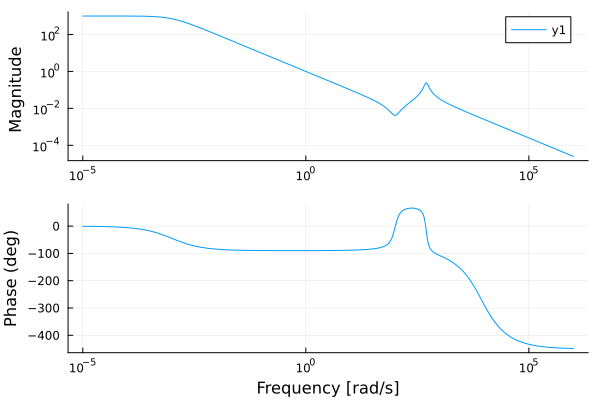

In [1]:
using RobustAndOptimalControl
using ControlSystemsBase 
using Plots


s = tf("s")

function pt2(w0,d)
    s = tf("s")
    return w0^2/(s^2 + 2*d*w0*s + w0^2)
end

ϵ = 0.001
G = 1/(s + ϵ) *pt2(500,0.1) * 1/pt2(100,0.2) * pade(0.0004,2) #* delay(0.0004)
G = minreal(G)

bodeplot(G)

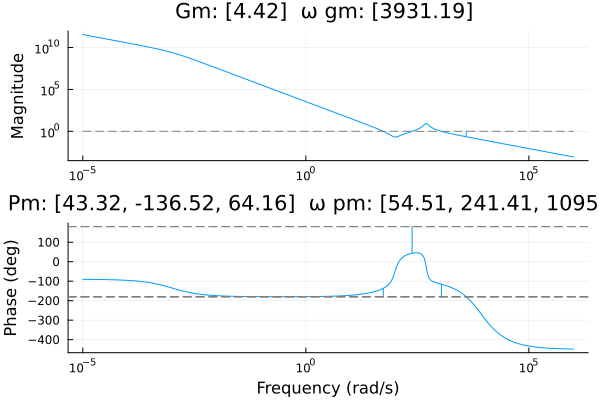

In [2]:

Kp = 35
Tn = 10

C = Kp*(1+ 1000/(Tn*s))


marginplot(G*C)

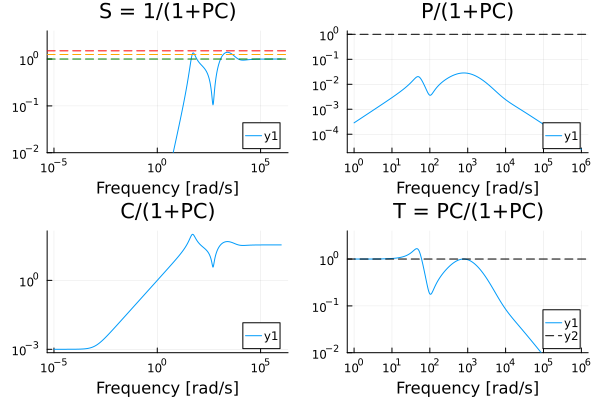

In [3]:
gangoffourplot(G,C)

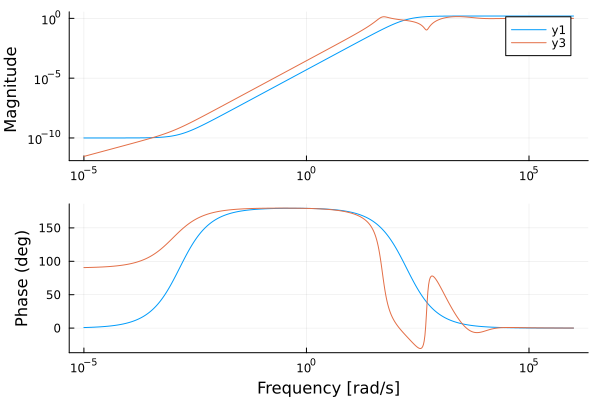

In [4]:
#WS = makeweight(1e-5, 10, 1.1) #|> tf
WS = makeweight(1e5, 0.5, 0.8) |> tf
WS = WS * WS

S1 = 1/(1 + G*C)
bodeplot([1/WS, S1])


In [5]:

WU = ss(0.01)

WT = []

P = hinfpartition(G, WS, WU, WT)
hinfassumptions(P)



┌ Warning: The matrix (A - B2*D12^-*C1) does not have full
│   rank, violation of assumption A5. = rank, violation of assumption A5.
└ @ RobustAndOptimalControl C:\Users\Elias\.julia\packages\RobustAndOptimalControl\Qj5nj\src\hinfinity_design.jl:58


false

2.48343130716498

┌ Warning: Numerical problems encountered, returned γ is adjusted to the γ achieved by the computed controller (γ - γactual = 13.963996731915358). Try solving the problem in higher precision by calling hinfsynthesize(...; ftype=BigFloat)
└ @ RobustAndOptimalControl C:\Users\Elias\.julia\packages\RobustAndOptimalControl\Qj5nj\src\hinfinity_design.jl:203


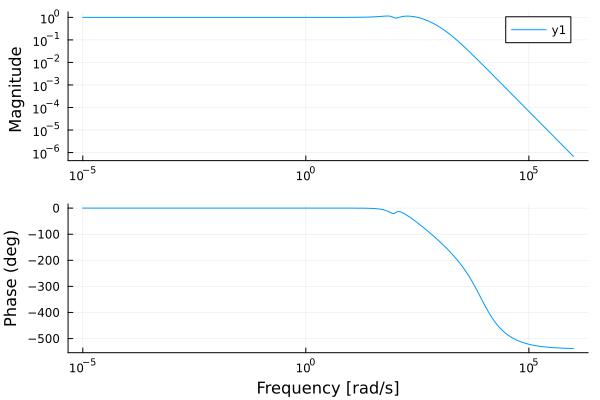

In [6]:
K, y = hinfsynthesize(P, γrel=1.05)

print(y)

Pcl, S, KS, T = hinfsignals(P, G, K)

Pcl = G*K/(1 + G*K)

bodeplot(Pcl)

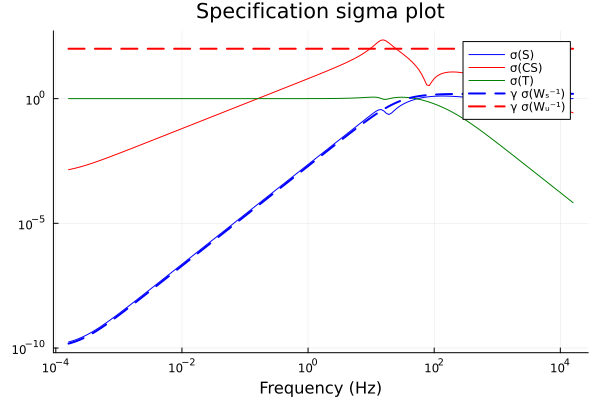

In [7]:
specificationplot([S,K*S,T], [WS,WU,WT])

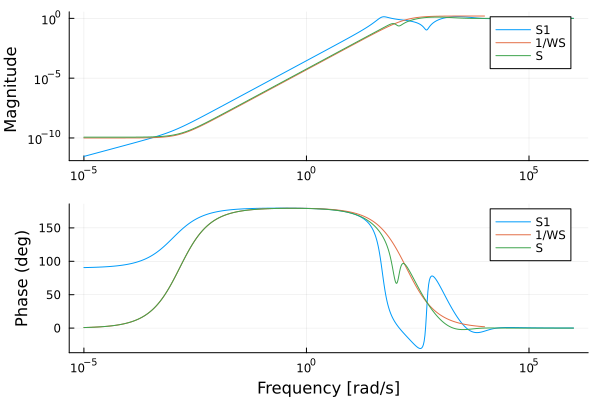

In [8]:
#bodeplot([S1, 1/ WS, S], label=["S1" "1/WS" "S"])
bodeplot(S1, label="S1")
bodeplot!(1/WS, label="1/WS")
bodeplot!(S, label="S")

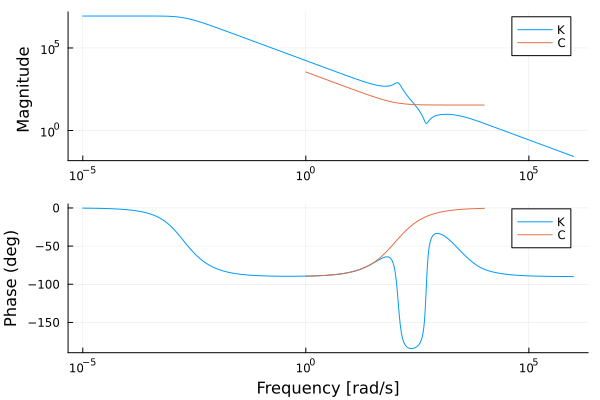

In [9]:
bodeplot(K, label="K")
bodeplot!(C, label="C")